# Codsoft's Data Science Task 2
## Sales Prediction

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Read the dataset

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Analyze the dataset

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


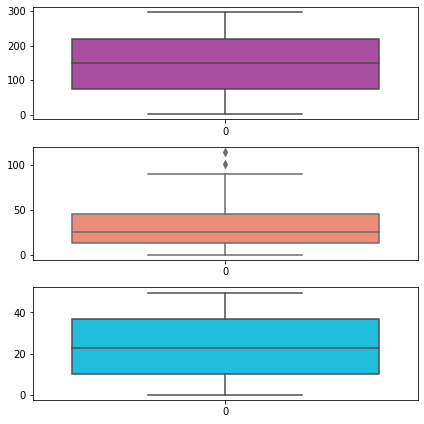

In [6]:
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(df['TV'], ax = axs[0],color="#B83FAE")
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1],color="#FF8066")
plt3 = sns.boxplot(df['Radio'], ax = axs[2],color="#00D2FC")
plt.tight_layout()

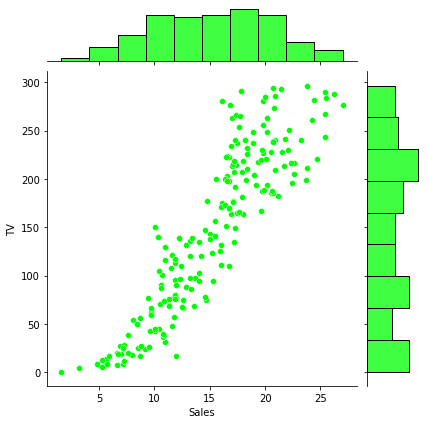

In [7]:
sns.jointplot(x= "Sales",y= "TV",data= df,color="lime")

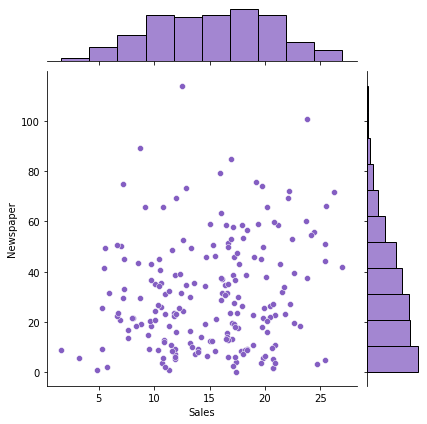

In [8]:
sns.jointplot(x= "Sales",y= "Newspaper",data= df,color="#845EC2")

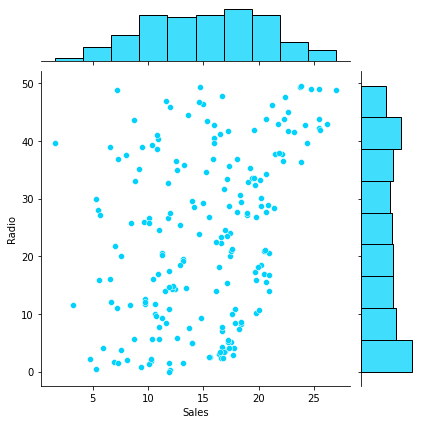

In [9]:
sns.jointplot(x= "Sales",y= "Radio",data= df,color="#00D2FC")

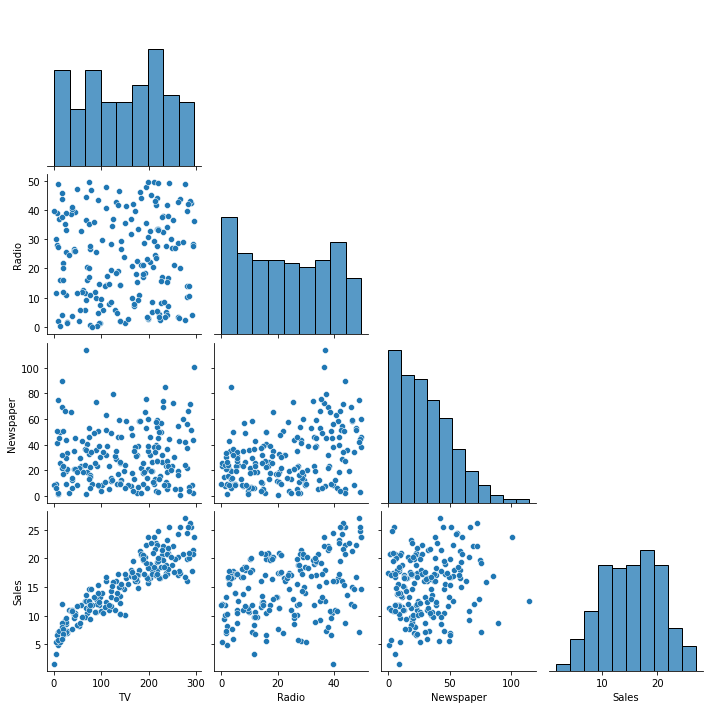

In [10]:
sns.pairplot(df,corner=True)

### Building ML Model (Linear Regression)

In [11]:
X = df.drop("Sales",axis=1)

In [12]:
y = df["Sales"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
prediction = lm.predict(X_test)

### Analyze the model's performance

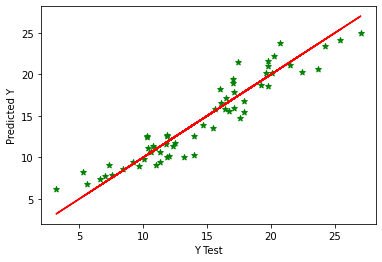

In [17]:
plt.scatter(y_test,prediction,c="g",marker="*")
plt.plot(y_test,y_test,c="r")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [18]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1.3731200698367851
MSE: 2.8685706338964967
RMSE: 1.6936855180040056


<AxesSubplot: xlabel='Sales', ylabel='Count'>

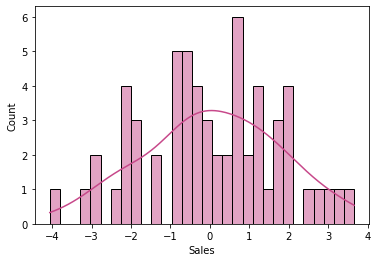

In [19]:
sns.histplot(y_test-prediction,bins=30,kde=True,color="#C7488A")

In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.054930
Radio,0.109558
Newspaper,-0.006194


In [21]:
metrics.explained_variance_score(y_test,prediction)

0.897329217709478